In [1]:
import numpy as np
import torch
import pandas as pd
import networkx as nx
import hypernetx as hnx
from HyperNetwork import *

In [2]:
# Create a random m-uniform hypergraph
n = 10
nodes = list(range(n))
e = 5
edges = list(range(e))
m = 4

hyperedges = {e: np.random.choice(nodes, m, replace=False) for e in edges}

In [3]:
H = hnx.Hypergraph(hyperedges)
H.edges

In [4]:
for hyperedge in H.edges:
    print(f'Hyperedge {hyperedge}: {H.incidence_dict[hyperedge]}')

Hyperedge 0: [9, 2, 8, 1]
Hyperedge 1: [2, 5, 9, 8]
Hyperedge 2: [3, 4, 8, 7]
Hyperedge 3: [6, 4, 9, 5]
Hyperedge 4: [0, 4, 9, 1]


In [5]:
def adjacency_tensor(H, n_nodes):
    """
    Compute the adjacency tensor of a m-uniform hypergraph.
    Parameters
    ----------
    H : hypernetx.Hypergraph
        Hypergraph
    Returns
    -------
    A : torch tensor
        Adjacency tensor of the hypergraph
    """
    m = len(H.edges[0])

    hyperedges = H.incidence_dict

    # Dimension of the adjacency tensor is \underbrace{n_nodes \times \cdots \times n_nodes}_{m}
    dim = [n_nodes] * m

    # Initialize the adjacency tensor
    A = torch.zeros(dim)

    # For all 1 ≤ i1, . . . , im ≤ n, set A(i1, . . . , im) = 1 if {i1, . . . , im} ∈ E, and 0 otherwise
    for i in H.edges:
        # Check if the hyperedge has the right number of nodes (m)
        hyperedge = hyperedges[i]
        if len(hyperedge) != m:
            raise ValueError("All hyperedges must have exactly {} nodes".format(m))
        
        # Set the adjacency tensor to 1 for all permutations of the hyperedge
        for perm in itertools.permutations(hyperedge):
            A[perm] = 1

    return A

In [6]:
Adjacency = adjacency_tensor(H, n_nodes = n)

In [7]:
len(Adjacency.shape)

4

In [8]:
hyperedges = dict()
list_e = []

In [9]:
indices = torch.nonzero(Adjacency).tolist()

In [10]:
i = 0
for index in indices:
        # Check if the index is a permutation of another index
        is_true = False
        for perm in itertools.permutations(index):
            if perm not in list_e:
                list_e.append(perm)
                is_true = True
        if is_true:
            hyperedges[i] = index
            i += 1

In [11]:
hyperedges

{0: [0, 1, 4, 9],
 1: [1, 2, 8, 9],
 2: [2, 5, 8, 9],
 3: [3, 4, 7, 8],
 4: [4, 5, 6, 9]}

In [12]:
H.incidence_dict.items()

dict_items([(0, [9, 2, 8, 1]), (1, [2, 5, 9, 8]), (2, [3, 4, 8, 7]), (3, [6, 4, 9, 5]), (4, [0, 4, 9, 1])])

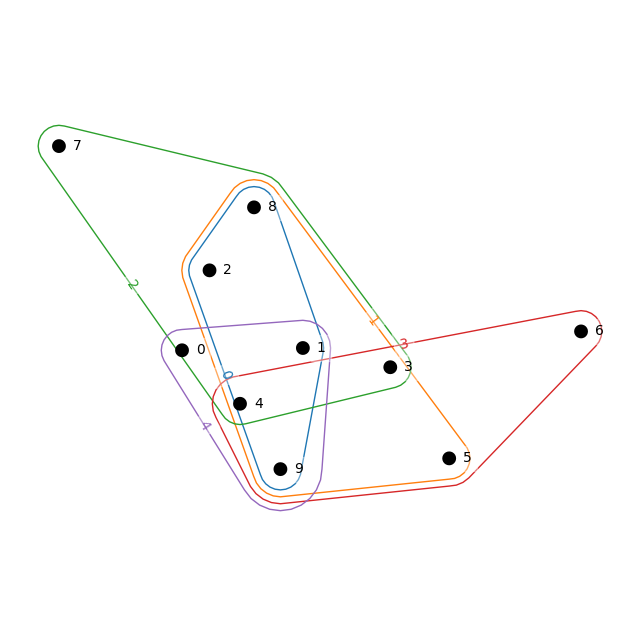

In [13]:
H = hnx.Hypergraph(H.incidence_dict)
hnx.draw(H)

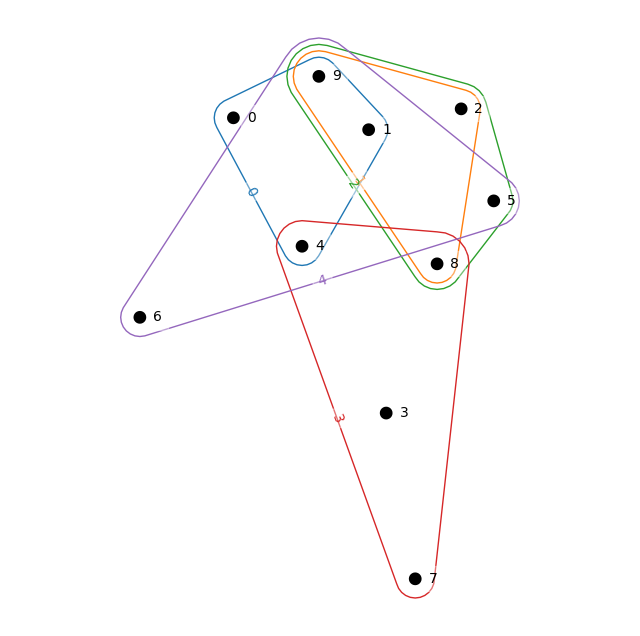

In [14]:
H = hnx.Hypergraph(hyperedges)
hnx.draw(H)

In [15]:
len(H.nodes)

10